<a href="https://colab.research.google.com/github/Amitha-sridhar/capstone_hotel_booking/blob/main/Amitha_Hotel__Booking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.


# Loading Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px

In [6]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/drive/MyDrive/Amitha_Capstone project/Hotel Bookings.csv')  #reading the csv file

# **Loading and understanding the data**

In [8]:
df #full data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [9]:
df.head() #first 5 rows

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [10]:
df.tail() #last 5 rows

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

In [11]:
df.T #transposing the data

0             1             2       \
hotel                           Resort Hotel  Resort Hotel  Resort Hotel   
is_canceled                                0             0             0   
lead_time                                342           737             7   
arrival_date_year                       2015          2015          2015   
arrival_date_month                      July          July          July   
arrival_date_week_number                  27            27            27   
arrival_date_day_of_month                  1             1             1   
stays_in_weekend_nights                    0             0             0   
stays_in_week_nights                       0             0             1   
adults                                     2             2             1   
children                                 0.0           0.0           0.0   
babies                                     0             0             0   
meal                                      BB            BB            BB   
country                                  PRT           PRT           GBR   
market_segment                        Direct        Direct        Direct   
distribution_channel                  Direct        Direct        Direct   
is_repeated_guest                          0             0             0   
previous_cancellations                     0             0             0   
previous_bookings_not_canceled             0             0             0   
reserved_room_type                         C             C             A   
assigned_room_type                         C             C             C   
booking_changes                            3             4             0   
deposit_type                      No Deposit    No Deposit    No Deposit   
agent                                    NaN           NaN           NaN   
company                                  NaN           NaN           NaN   
days_in_waiting_list                       0             0             0   
customer_type                      Transient     Transient     Transient   
adr                                      0.0           0.0          75.0   
required_car_parking_spaces                0             0             0   
total_of_special_requests                  0             0             0   
reservation_status                 Check-Out     Check-Out     Check-Out   
reservation_status_date           2015-07-01    2015-07-01    2015-07-02   

                                      3             4             5       \
hotel                           Resort Hotel  Resort Hotel  Resort Hotel   
is_canceled                                0             0             0   
lead_time                                 13            14            14   
arrival_date_year                       2015          2015          2015   
arrival_date_month                      July          July          July   
arrival_date_week_number                  27            27            27   
arrival_date_day_of_month                  1             1             1   
stays_in_weekend_nights                    0             0             0   
stays_in_week_nights                       1             2             2   
adults                                     1             2             2   
children                                 0.0           0.0           0.0   
babies                                     0             0             0   
meal                                      BB            BB            BB   
country                                  GBR           GBR           GBR   
market_segment                     Corporate     Online TA     Online TA   
distribution_channel               Corporate         TA/TO         TA/TO   
is_repeated_guest                          0             0             0   
previous_cancellations                     0             0             0   
previous_bookings_not_canceled             0             0             0   
reserved_

In [12]:
df.size #number of total elements

3820480

In [13]:
df.info() #number of columns, column labels, column data types,count of non-null values in each column with memory usage & range index 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
df.describe() #description of each column of data

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [15]:
df.shape #columns*rows

(119390, 32)

In [16]:
df.dtypes #data types in the daata

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
df.isnull().sum().sort_values(ascending=False) #checking the null values in the data

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

## Data Wrangling:-

> clearing Null values

> Handling Outliers 

> Dropping the columns which dont contribute much to our staudies

In [18]:
#since there are only 4 null values we are filling it with the median value of the column
df['children'].median()
df['children'].fillna(df['children'].median(), inplace=True)

In [19]:
#since less than 1% of values are null we can fill it with the mode value of the column
df['country'].mode()
df.loc[df['country'] == 'PRT', 'country'].count()
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [20]:
df.columns #all columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
df['country'].unique() #unique country names in the column

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [22]:
df['country'].nunique()#number of country names

177

Handling outliers using the **Interquartile range**
interquartile range (IQR) measures the spread of the middle half of our data. It is the range for the middle 50% of our sample. Using this IQR to assess the variability where most of our values lie.

In [23]:
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",       #checking all numerical columns to do the function on
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room','reservation_status_date',
                      'arrival_date_year','arrival_date_day_of_month','agent','company']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

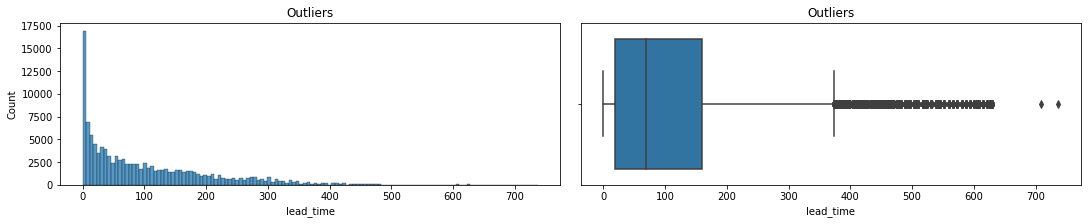

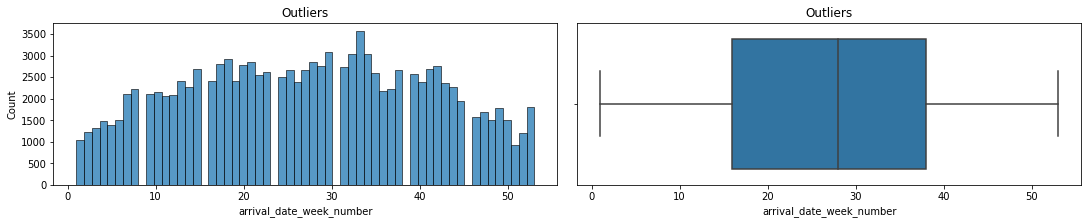

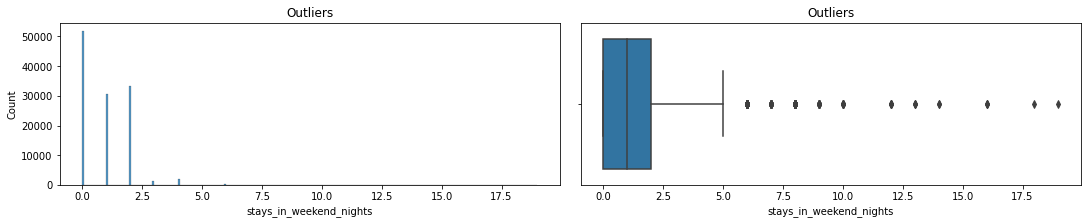

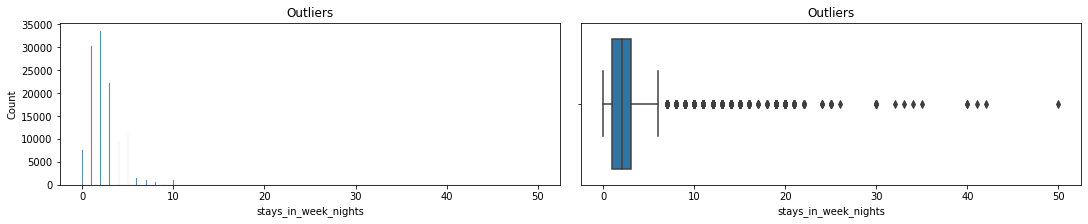

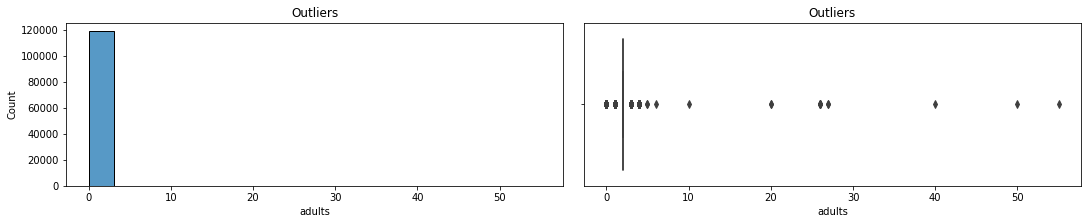

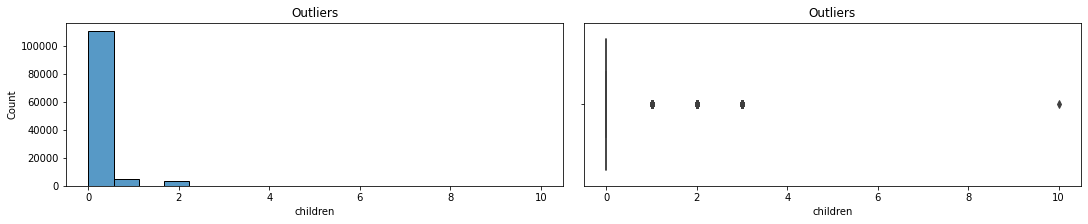

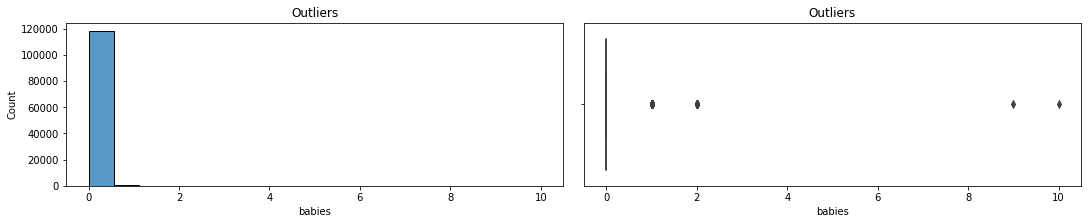

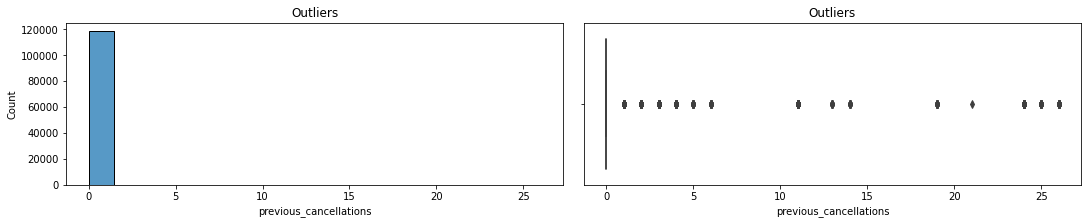

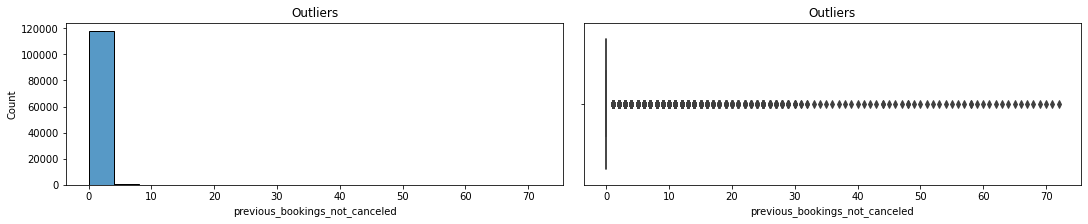

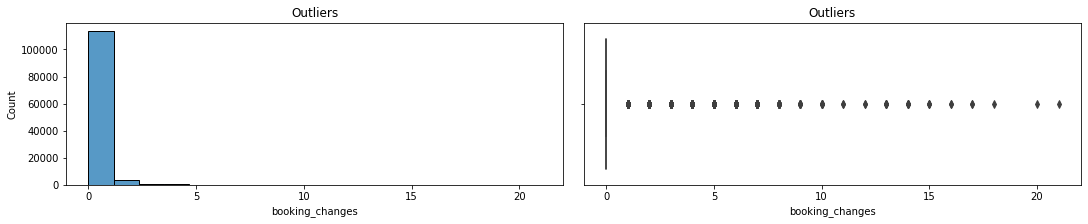

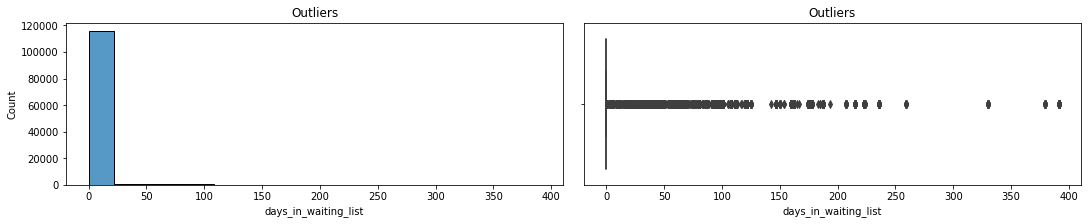

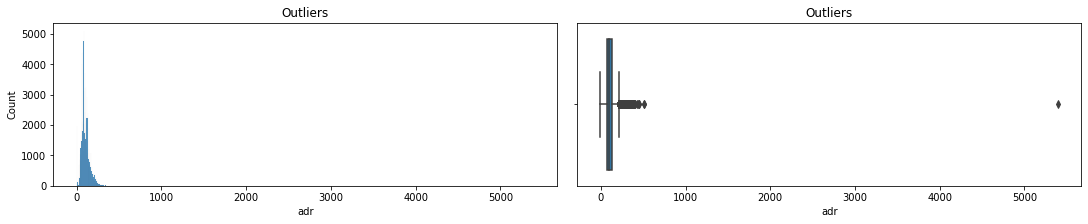

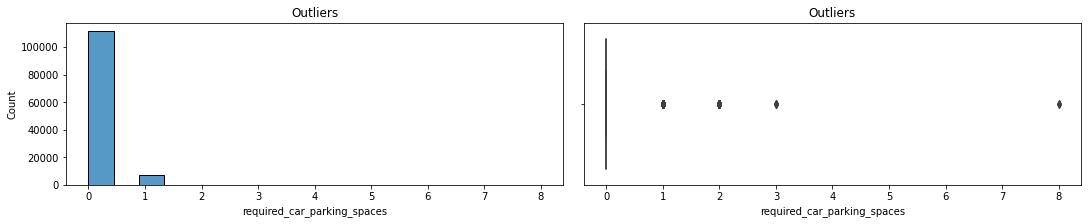

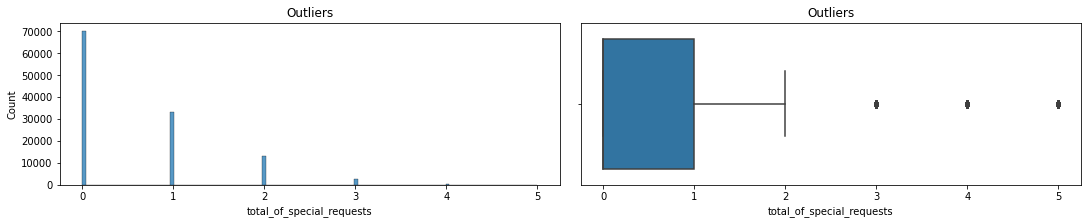

In [24]:
for col in numeric_features:  #subplotting all the values with outliers 
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df[col], ax=ax[0]).set(title="Outliers")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers")

In [25]:
new_df = df.copy()#redefining the data and setting the outliers value to a limit

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.previous_cancellations > 0,'previous_cancellations'] = 1
new_df.loc[new_df.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled'] = 1
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [26]:
for col in ['lead_time','adr']:#redefining the data and setting the outliers value with the range
  
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

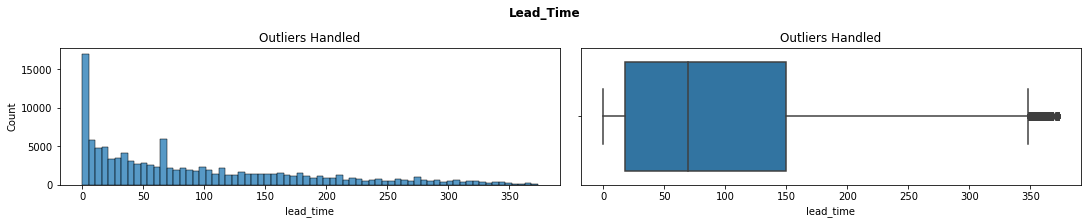

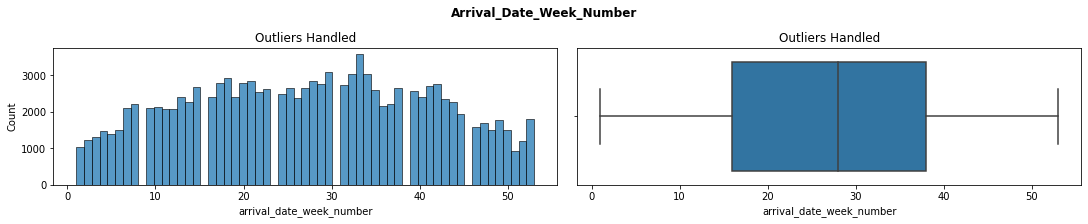

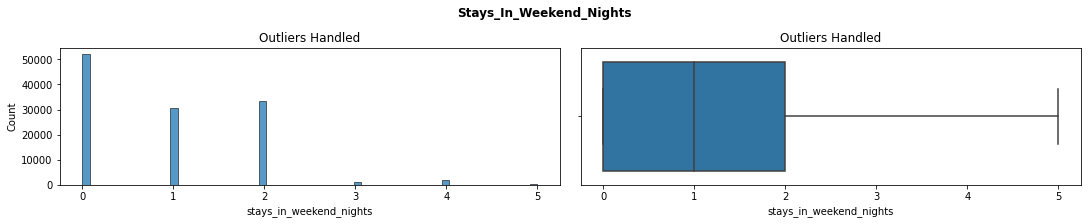

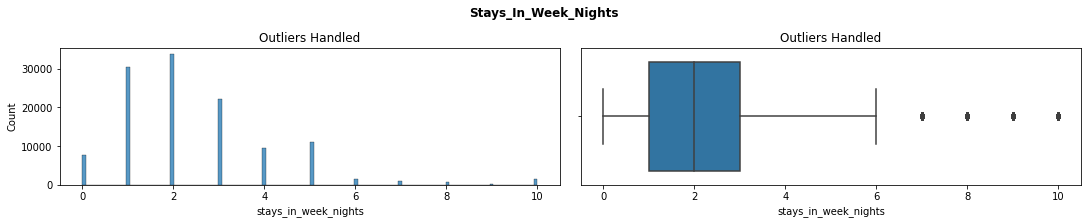

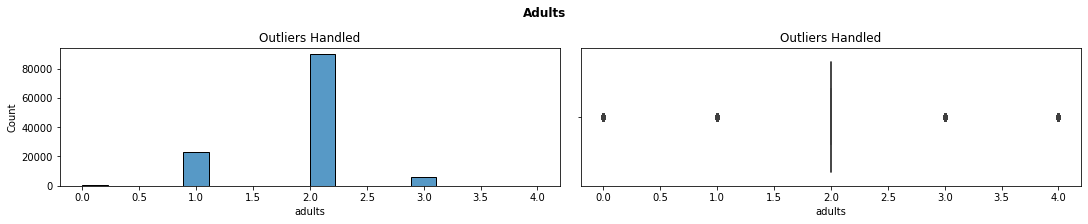

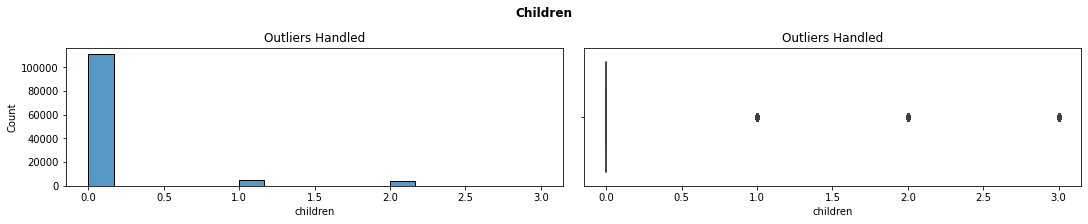

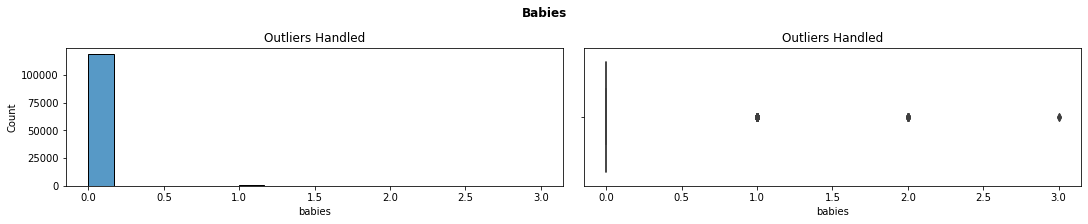

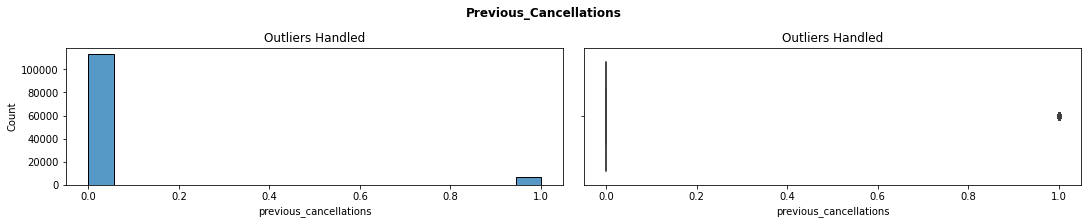

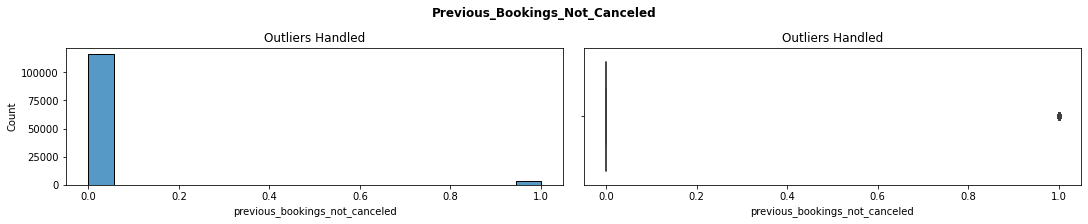

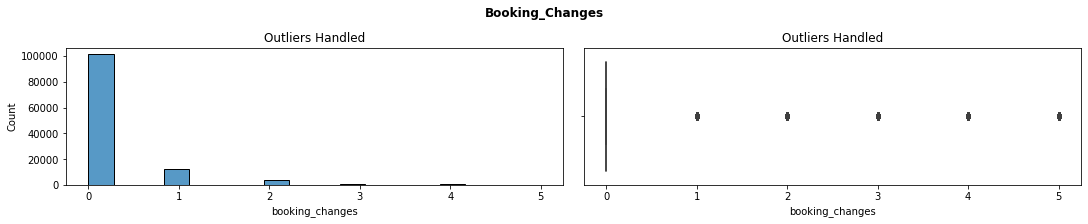

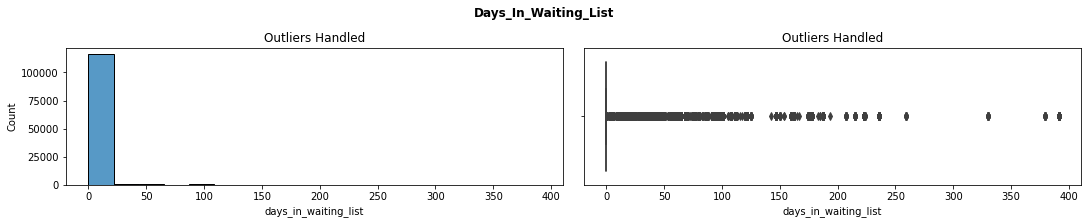

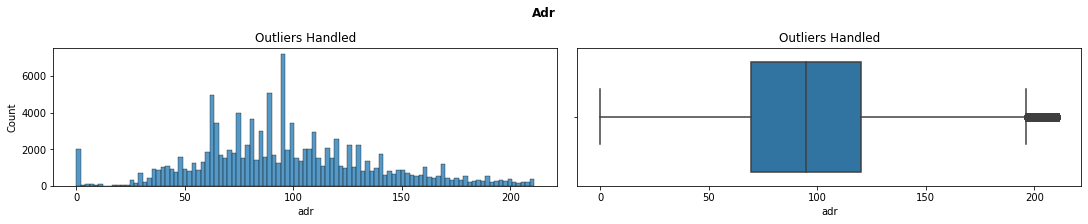

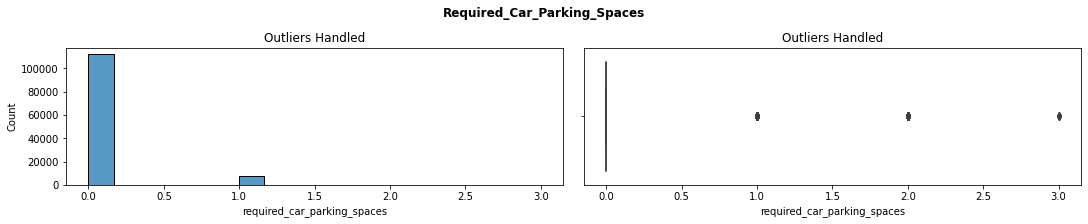

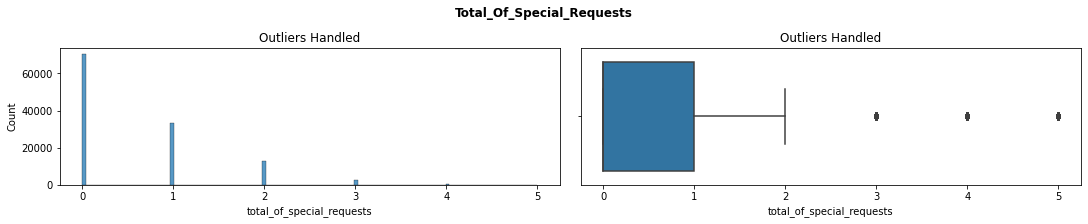

In [27]:
for col in numeric_features:#subplotting all the graphs with the before and after 
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(new_df[col], ax=ax[0]).set(title="Outliers Handled")
  sns.boxplot(new_df[col], ax=ax[1]).set(title="Outliers Handled")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

DATA is CLEAN!
Now we can start our analysis on this

### Exploratory Data Analysis and DATA Visualization
We will now start to analyse the data and visually represent the result

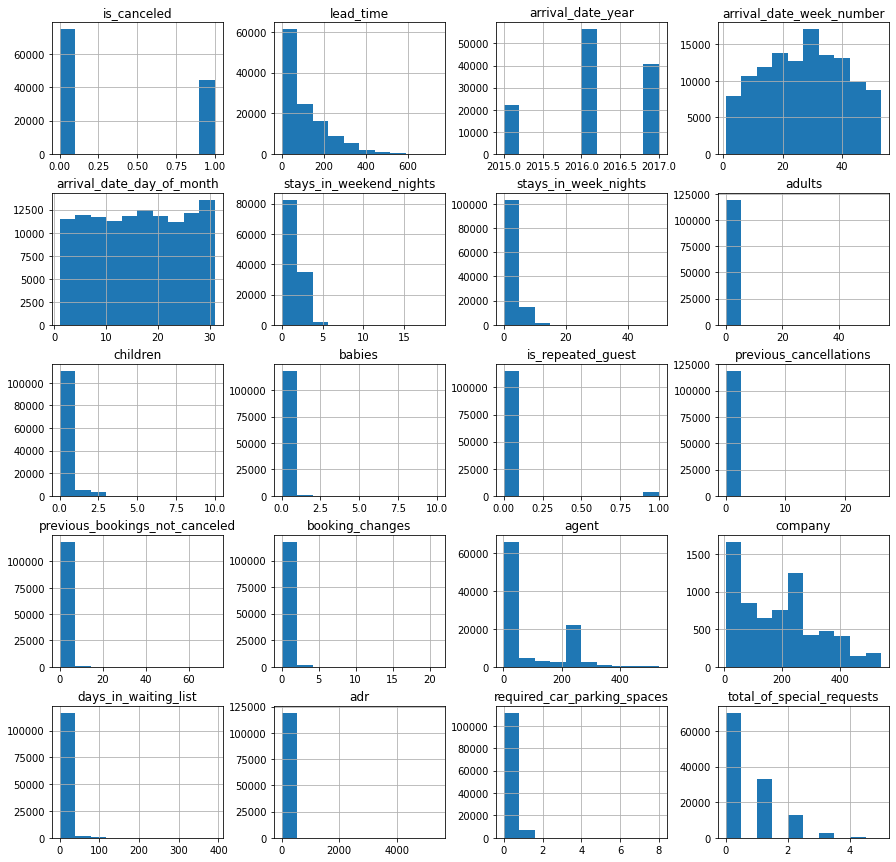

In [28]:
df.hist(figsize=(15,15))# to see the distribution of values
plt.show()

The sucess of a hotel is judged by its revenue. So this coreralation map of all the numerical columns that will be give the factors which affeect the revenue.

# Data Manipulation:-
 Calculation derived by columns


*   **kids**= children+baby
*   **stays** is the actual count of stays of non cancelled guests
stays=stays_in_weekend_nights+stays_in_week_nights

*   **guest**=adults+kids
*  **revenue** is the calculation of turned up guests multpilied with their adr

In [29]:
new_df['kids']=new_df['children']+new_df['babies'] #clubbing the values if children and babies to kids
new_df['kids']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: kids, Length: 119390, dtype: float64

In [30]:
new_df['stay']=new_df['stays_in_weekend_nights']+new_df['stays_in_week_nights'] #total stays

In [31]:
new_df['guest']=new_df['adults']+new_df['kids'] #total number of guests

In [32]:
revenue_guests = df.loc[df["is_canceled"] == 0] #Condition to select non cancelled guests
revenue_guests['revenue'] = revenue_guests['adr'] * (revenue_guests['stays_in_weekend_nights'] + revenue_guests['stays_in_week_nights']) #non cancelled guests with the number of nights they stay
revenue_guests['revenue'].value_counts
new_df['revenue']=revenue_guests['revenue']
new_df['revenue'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 119390, dtype: float64

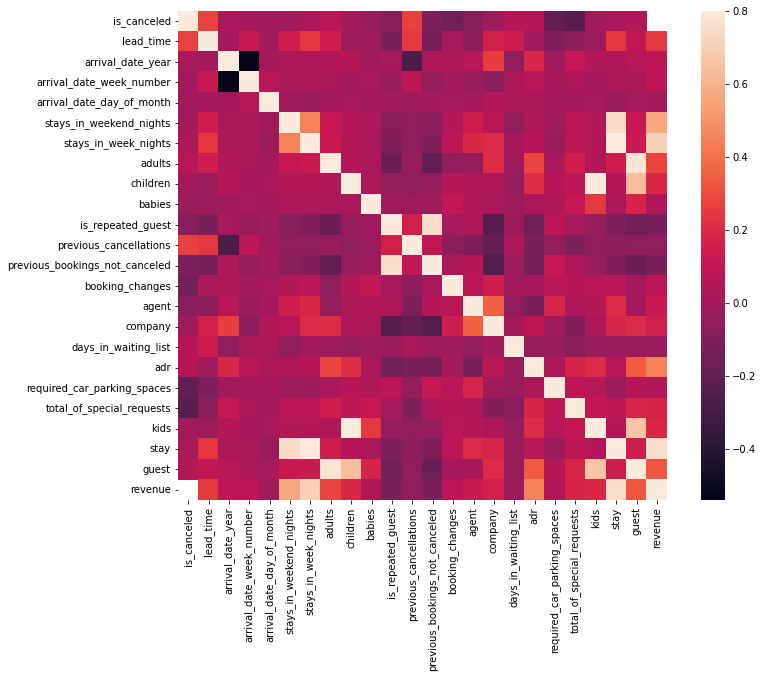

In [33]:
corrmat = new_df.corr()#corelation to be seen within the values and there are some values directly related to the revenue
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Hotel booking study
Since this is Hotel Booking we will be starting our study by selecting all fields related to hotel

In [34]:
new_df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

### Data Study and Data Visualization


Text(0.5, 1.0, 'Study of the hotel to resort ratio in our data')

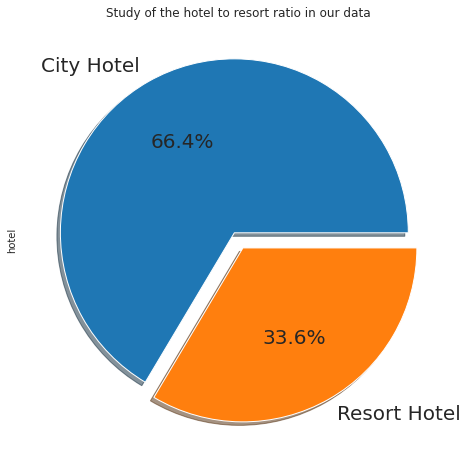

In [35]:
sns.set_style("dark") #Ratio of hotel type and resort type in our data
new_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Study of the hotel to resort ratio in our data')

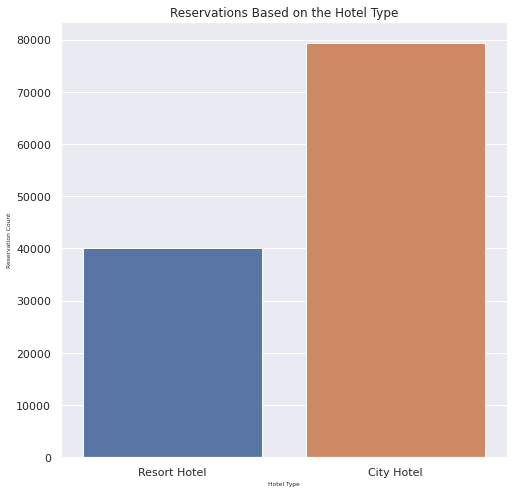

In [36]:
#Reservation study as per hotel types in our study
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.countplot(x='hotel', data = new_df)
graph.set(title='Reservations Based on the Hotel Type')
graph.set_xlabel('Hotel Type', fontsize = 6)
graph.set_ylabel('Reservation Count', fontsize = 6)
plt.show()

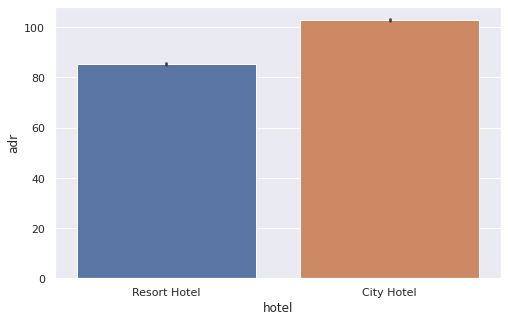

In [37]:
df_adr = new_df['adr'].agg(np.mean)   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = new_df['hotel'], y = new_df['adr'] )
plt.show()


This says that in this study we have more data of city hotel to study.
Also the average daily rate in higher in city hotels

Text(0, 0.5, 'Avg revenue')

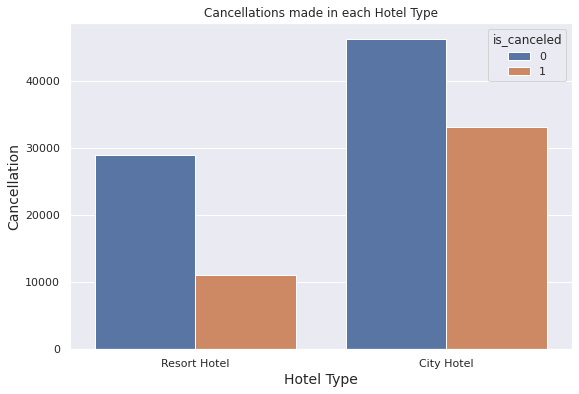

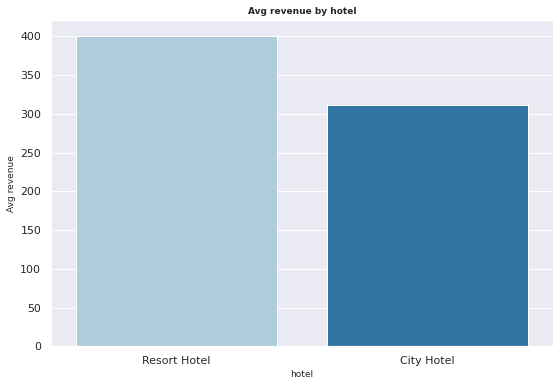

In [38]:
#study of hotel cancellations and the actual revenue earned by the hotels
fig, axes = plt.subplots(1,1,figsize=(9, 6))      
graph = sns.countplot(x = df['hotel'],hue=df['is_canceled'])
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Paired")
graph.set(title='Cancellations made in each Hotel Type')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

hotel_adr=new_df.groupby(['hotel'])['revenue'].mean().reset_index(). round(1)
hotel_adr = hotel_adr.sort_values(by='revenue', ascending = False)
countplt, ax = plt.subplots(figsize = (9,6))
ax =sns.barplot(x='hotel',y='revenue', data = hotel_adr)
ax.set_title('Avg revenue by hotel',fontsize = 9, fontweight='bold' )
ax.set_xlabel('hotel', fontsize = 9)
ax.set_ylabel('Avg revenue', fontsize = 9)

This shows that the cancellation is more in city hotels. Thus even though the adr and booking is higher in city hotels potential revenue is generated byt the resort hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'is repeated customers')

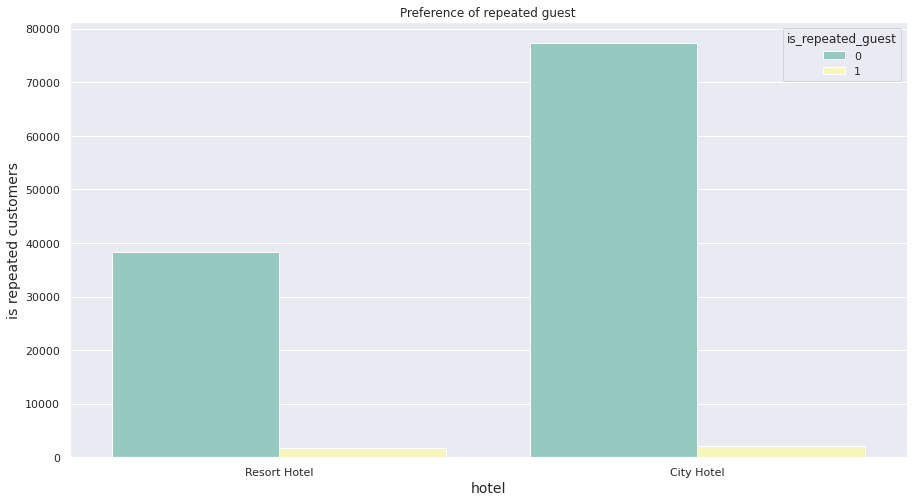

In [39]:
# to study if the customers are repeated or new
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set3")
graph = sns.countplot(df["hotel"], hue=df["is_repeated_guest"], data=df)
graph.set(title='Preference of repeated guest')
graph.set_xlabel('hotel',fontsize = 14)
graph.set_ylabel('is repeated customers',fontsize = 14)

Most booking is done by new customer and a very low share is byt he repeated customers.

Text(0, 0.5, 'Cancellation')

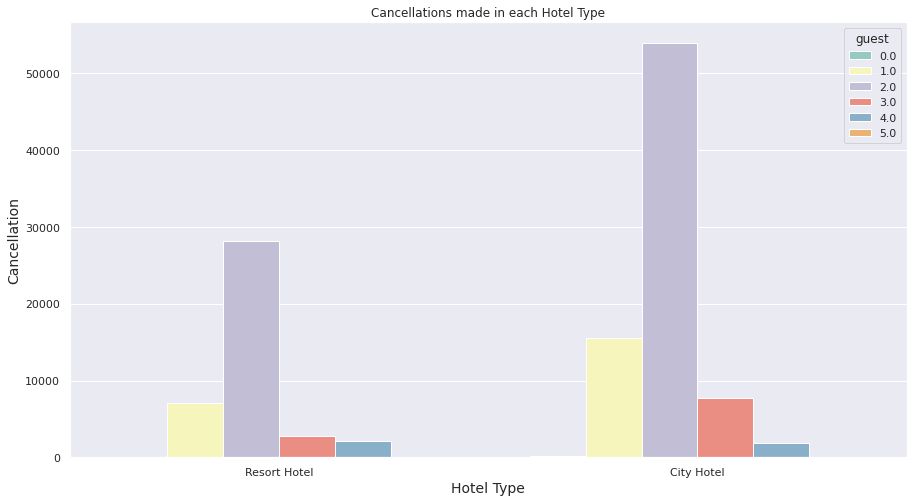

In [40]:
# cancellations is done by usually which group of customers
graph = sns.countplot(x = new_df['hotel'],hue=new_df['guest'])
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Spectral")
graph.set(title='Cancellations made in each Hotel Type')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

This shows that a family/group of 2 often cancel their booking


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cancellation')

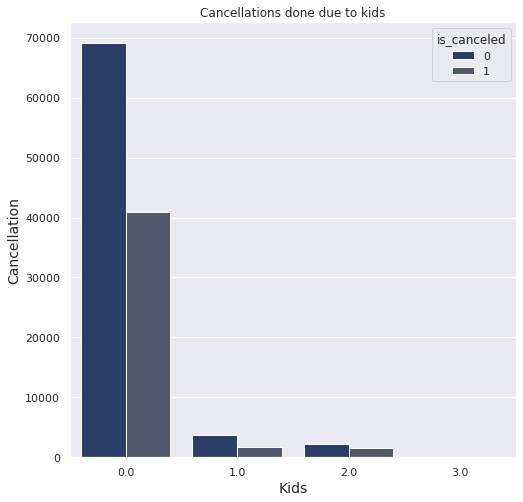

In [41]:
#Checking the affect of kids in cancellations and booking
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("cividis")
graph = sns.countplot(new_df['kids'],hue=new_df['is_canceled'])
graph.set(title='Cancellations done due to kids')
graph.set_xlabel('Kids',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

Kids play no major role in cancellation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Bookings')

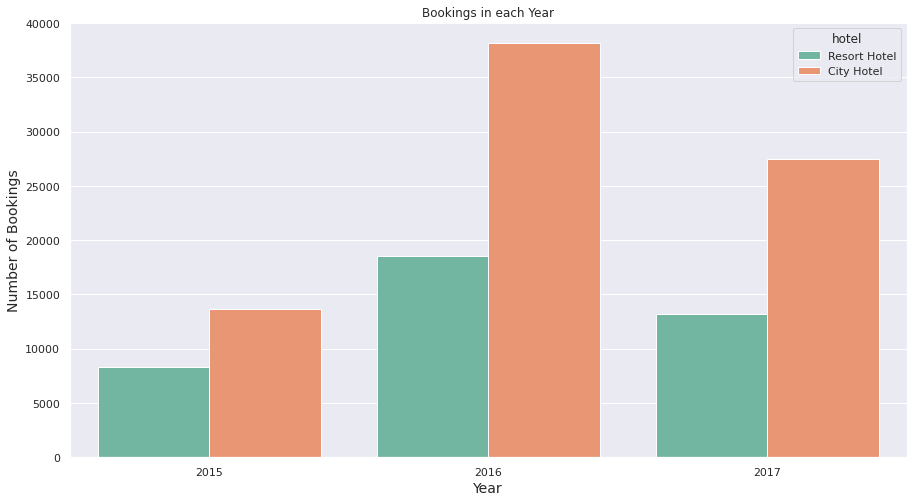

In [42]:
#booking in hotels across each year
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set2")
graph = sns.countplot(new_df["arrival_date_year"], hue=new_df["hotel"], data=new_df)
graph.set(title='Bookings in each Year')
graph.set_xlabel('Year',fontsize = 14)
graph.set_ylabel('Number of Bookings',fontsize = 14)

Travel seems to high in the year 2016 in bothe the hotel types.

Text(0, 0.5, 'Revenue')

<Figure size 648x432 with 0 Axes>

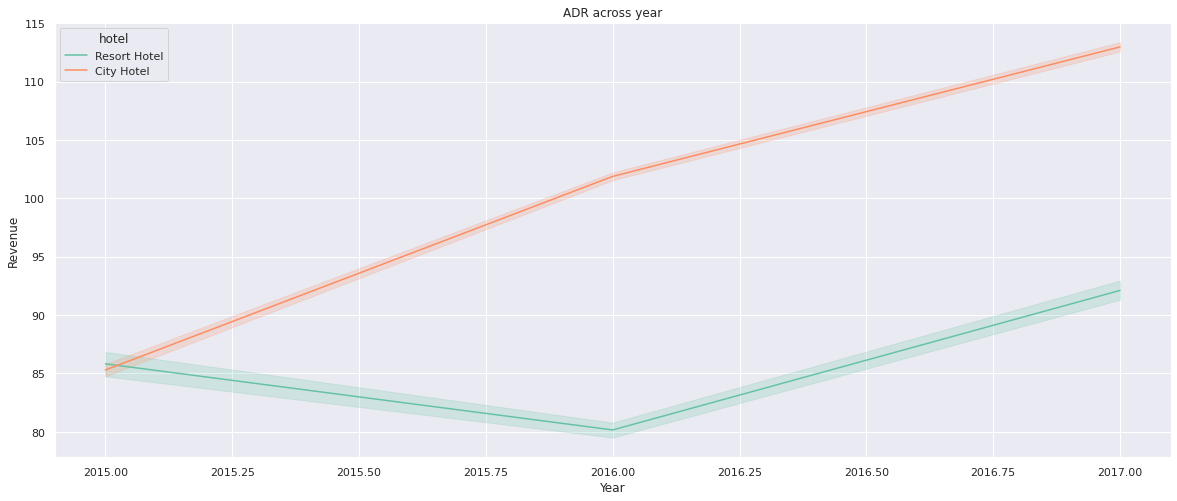

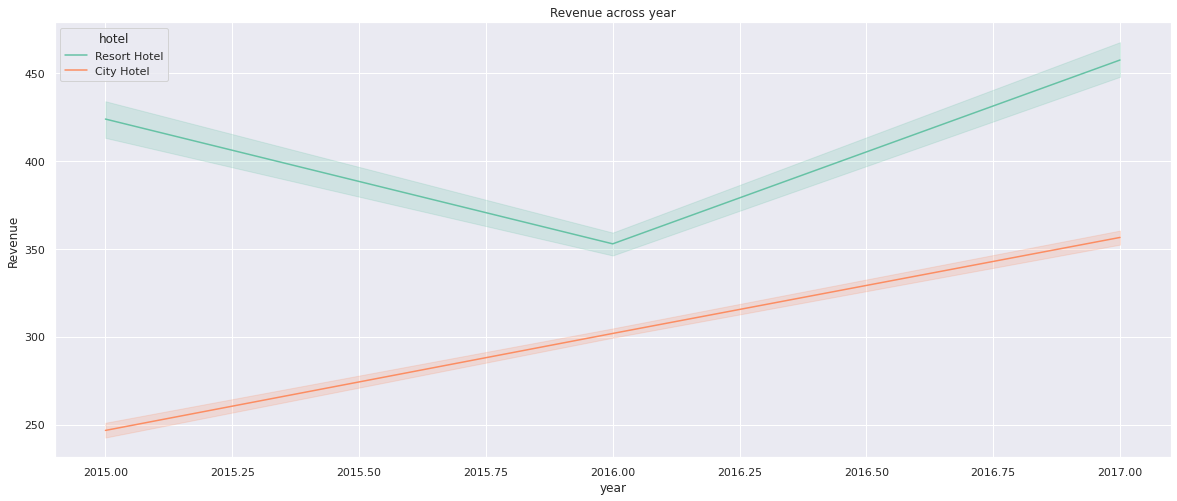

In [43]:
#ADR and revenue across year
fig, axes = plt.subplots(0,1,figsize=(9, 6))  
plt.figure(figsize=(20,8))
sns.lineplot(x=new_df['arrival_date_year'],y=new_df['adr'],hue=new_df['hotel'])

# set lables
plt.title('ADR across year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.figure(figsize=(20,8))
sns.lineplot(x=new_df['arrival_date_year'],y=new_df['revenue'],hue=new_df['hotel'])

# set lables
plt.title('Revenue across year')
plt.xlabel('year')
plt.ylabel('Revenue')

There has been a constant rise in the adr in the city hotel category throughout the 3 years. But a dip in the resort category in the year 2016. that has resulted in higher bookings in the resort hotel.
the revenue is a constant rise throughout the 3 years in city hotel but as the ADR dips in the middle year the revenue dips for the resort hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Bookings')

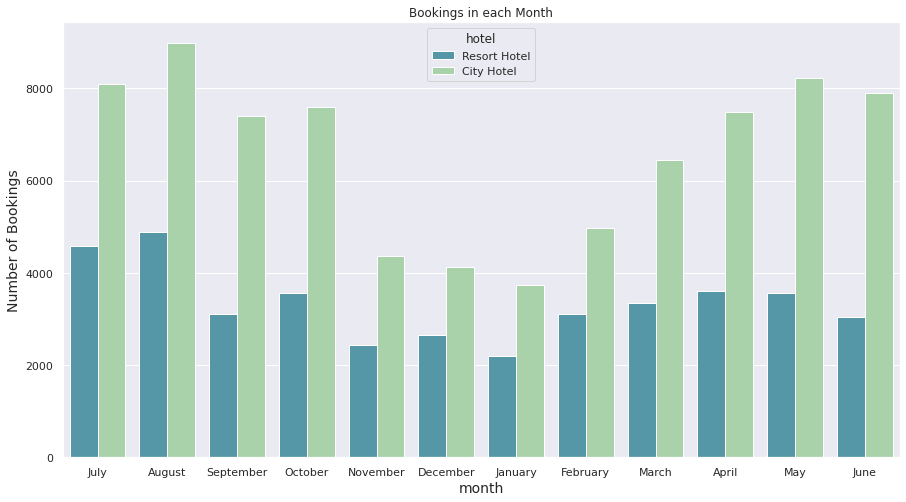

In [44]:
#studying the data across months
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Spectral_r")
graph = sns.countplot(new_df["arrival_date_month"], hue=new_df["hotel"], data=new_df)
graph.set(title='Bookings in each Month')
graph.set_xlabel('month',fontsize = 14)
graph.set_ylabel('Number of Bookings',fontsize = 14)

Text(0, 0.5, 'Revenue')

<Figure size 648x432 with 0 Axes>

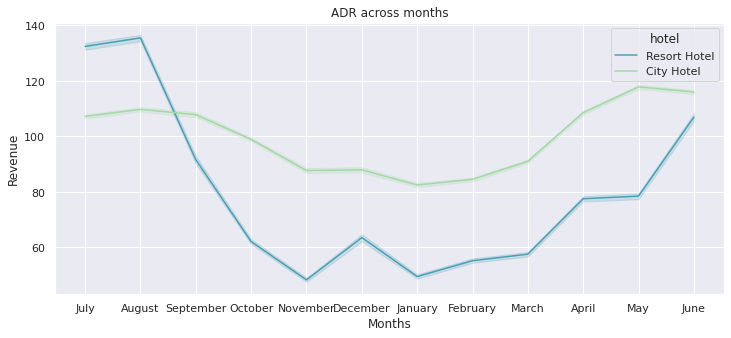

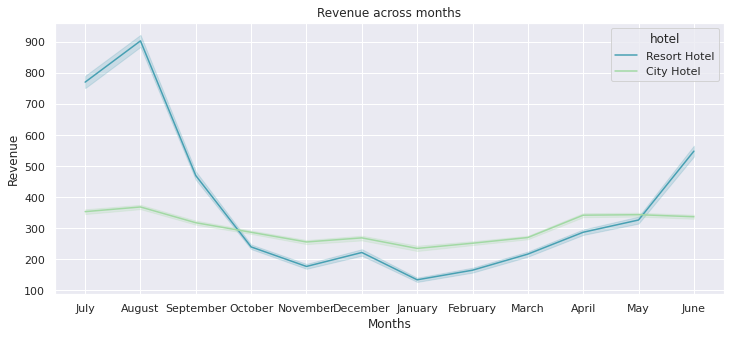

In [45]:
#studying adr and revenue across months
fig, axes = plt.subplots(0,1,figsize=(9, 6))  
plt.figure(figsize=(12,5))
sns.lineplot(x=new_df['arrival_date_month'],y=new_df['adr'],hue=new_df['hotel'])

# set lables
plt.title('ADR across months')
plt.xlabel('Months')
plt.ylabel('Revenue')

plt.figure(figsize=(12,5))
sns.lineplot(x=new_df['arrival_date_month'],y=new_df['revenue'],hue=new_df['hotel'])

# set lables
plt.title('Revenue across months')
plt.xlabel('Months')
plt.ylabel('Revenue')

Studying the above graphs the booking .
As per the booking status the city hotels are at a peak between May to August and the resort hotel type is at peak in July and August. This result is shown in ADR graph.
In the final graph even after all the cancellations the actual revenue still continues the same trend with the mean being reduced by a little

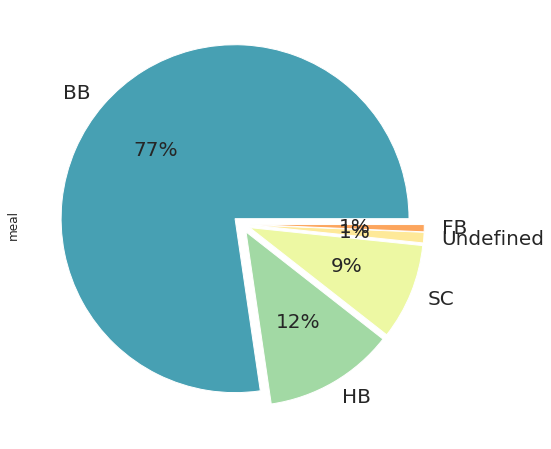

In [46]:
#distribution of meals across data
new_df['meal'].value_counts().plot.pie(explode=[0.05]*5, autopct='%.0f%%', figsize=(19,8),fontsize=20)

This study says that majority of the customers do prefer the BB meal type in general

Text(0, 0.5, 'Price')

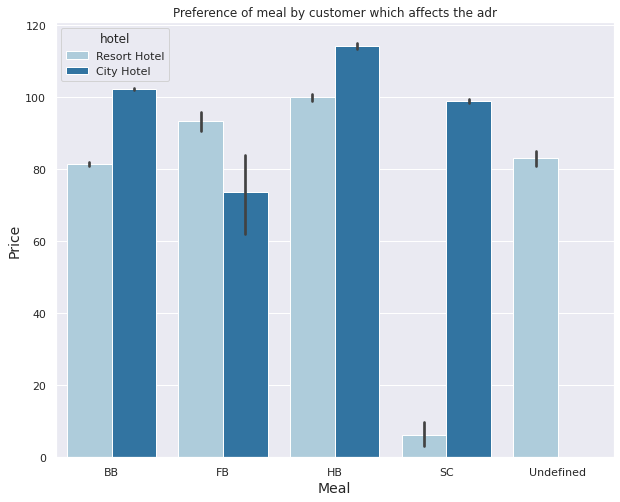

In [47]:
#which meal is more preferred
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Paired")
graph = sns.barplot(x='meal', y='adr', hue='hotel',data=new_df)
graph.set(title='Preference of meal by customer which affects the adr')
graph.set_xlabel('Meal',fontsize = 14)
graph.set_ylabel('Price',fontsize = 14)


This shows that City hotels have a wide options of choice for meal type and they charge them accordingly but the generate most through the HB plan.its the similar case in resort type.

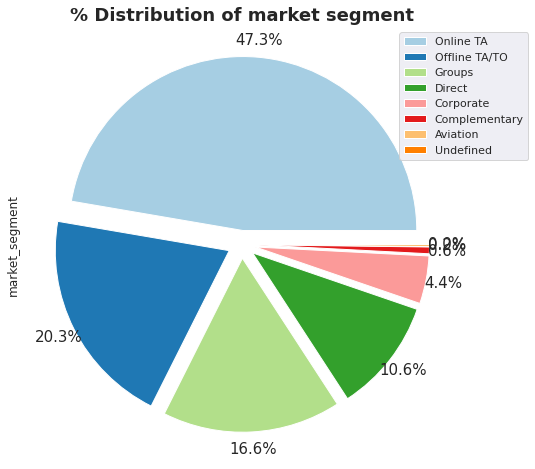

In [48]:
#distribution of market share for booking 
new_df['market_segment'].value_counts().plot.pie(explode=[0.08]*8,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None, pctdistance=1.1, labeldistance=1.2)
sns.set_palette("Set3_r")
labels=new_df['market_segment'].value_counts().index.tolist()
plt.title('% Distribution of market segment',fontsize = 18, fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Close to 50% of market segment is from online TA

Text(0, 0.5, 'revenue')

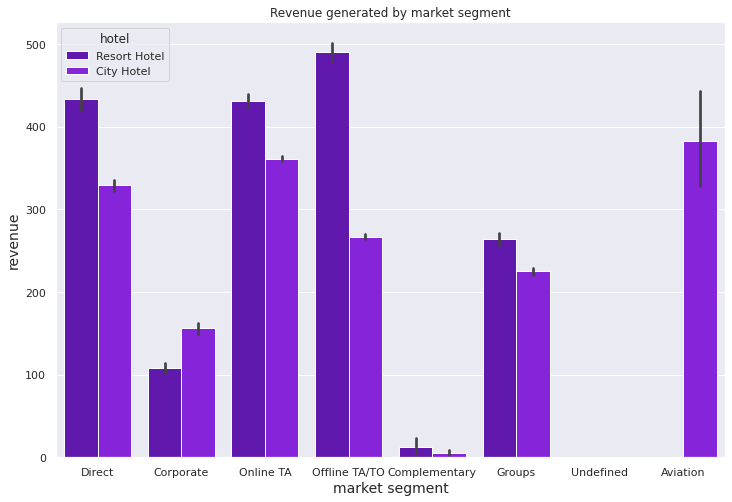

In [49]:
#revenue generated by different market segment
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("gnuplot")
graph = sns.barplot(x='market_segment', y='revenue', hue='hotel',data=new_df)
graph.set(title='Revenue generated by market segment')
graph.set_xlabel('market segment',fontsize = 14)
graph.set_ylabel('revenue',fontsize = 14)

This study shows that majority of business to resort hotel type is bought in by offline TA/TO followed by Online TA and Direct at almost the same rate.
Aviation is a strong Market Segment for the City hotel type

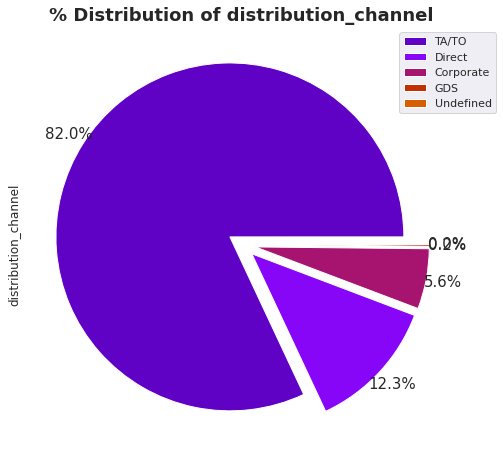

In [50]:
# market share of distribution channels
new_df['distribution_channel'].value_counts().plot.pie(explode=[0.08]*5,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None, pctdistance=1.1, labeldistance=1.2)
sns.set_palette("Set3_r")
labels=new_df['distribution_channel'].value_counts().index.tolist()
plt.title('% Distribution of distribution_channel',fontsize = 18, fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

GDS is a major factor for the revenue of City hotel.


Text(0, 0.5, 'revenue')

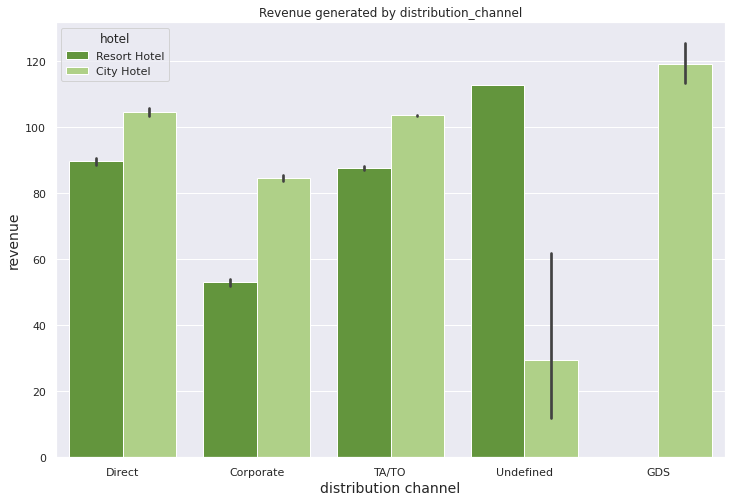

In [51]:
#revenue generated by different market segment
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("PiYG_r")
graph = sns.barplot(x='distribution_channel', y='adr', hue='hotel',data=new_df)
graph.set(title='Revenue generated by distribution_channel')
graph.set_xlabel('distribution channel',fontsize = 14)
graph.set_ylabel('revenue',fontsize = 14)

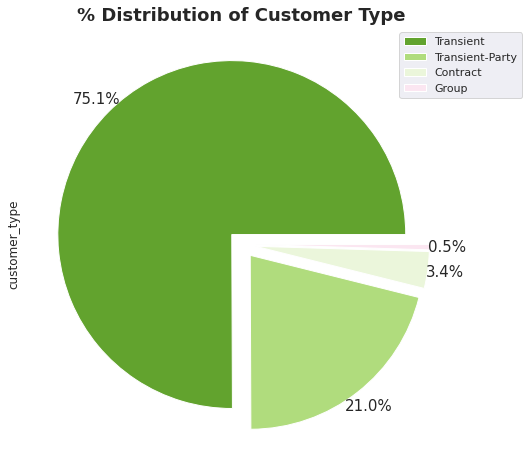

In [52]:
# market share of customer type
new_df['customer_type'].value_counts().plot.pie(explode=[0.08]*4,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None, pctdistance=1.1, labeldistance=1.2)
sns.set_palette("Set3")
labels=new_df['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type',fontsize = 18, fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Text(0.5, 1.0, 'Adr based on Customer type')

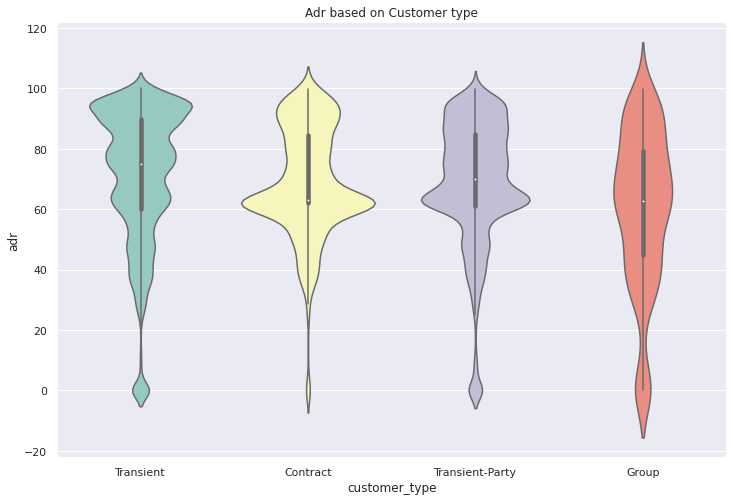

In [53]:
customer_adr=new_df[new_df.adr < 100]
viz_2=sns.violinplot(data=customer_adr, x='customer_type', y='adr')
viz_2.set_title('Adr based on Customer type')

Text(0, 0.5, 'revenue')

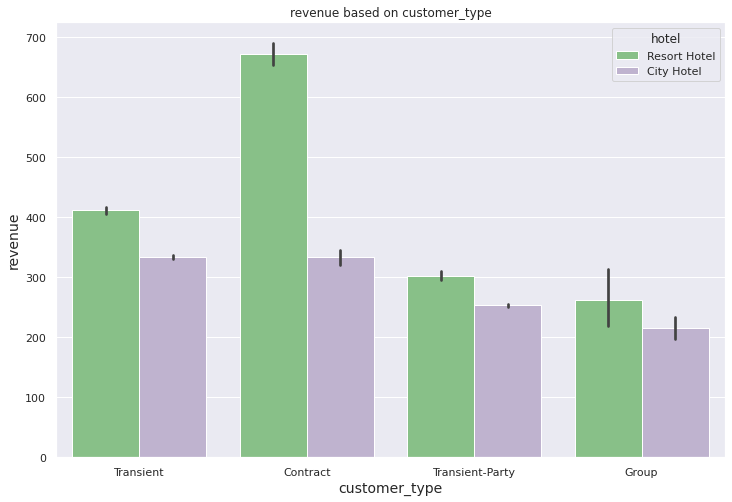

In [54]:
#revenue generated by different market segment
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Accent")
graph = sns.barplot(x='customer_type', y='revenue', hue='hotel',data=new_df)
graph.set(title='revenue based on customer_type')
graph.set_xlabel('customer_type',fontsize = 14)
graph.set_ylabel('revenue',fontsize = 14)

Most of the revenue for the resort typre hotel comes from the contract customer type whereas the city hotel type has a highes share divided equally between Transient and contract customer type

Text(0.5, 1.0, 'Study of the hotel to resort ratio in our data')

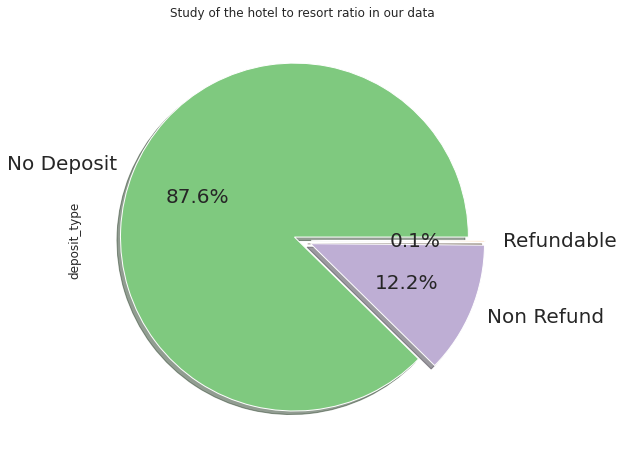

In [55]:
sns.set_style("dark") #Ratio of deposit type
new_df['deposit_type'].value_counts().plot.pie(explode=[0.05, 0.05,.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Study of the hotel to resort ratio in our data')

Text(0, 0.5, 'adr')

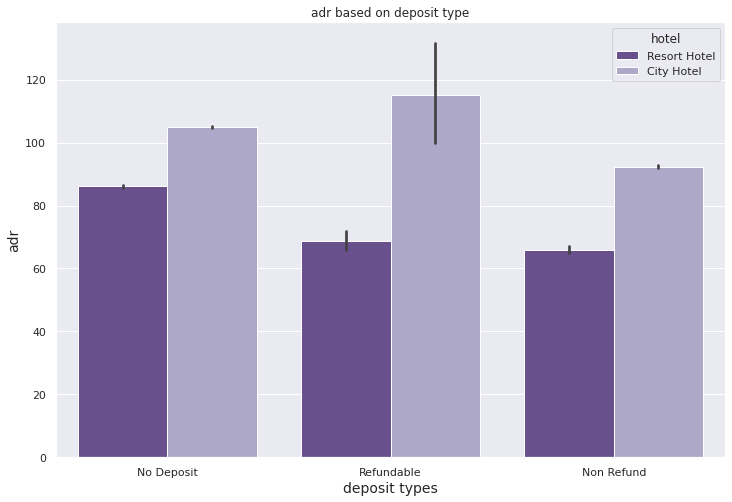

In [56]:
#adr distributioon based on deposit type
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("PuOr_r")
graph = sns.barplot(x='deposit_type', y='adr', hue='hotel',data=new_df)
graph.set(title='adr based on deposit type')
graph.set_xlabel('deposit types',fontsize = 14)
graph.set_ylabel('adr',fontsize = 14)

When the hotels offer refundable rooms the adr will rise as there is no surity of rooms. non refundable rooms are direct revenue as they cant be cancelled thus those ADR are less.

Text(0, 0.5, 'Cancellation')

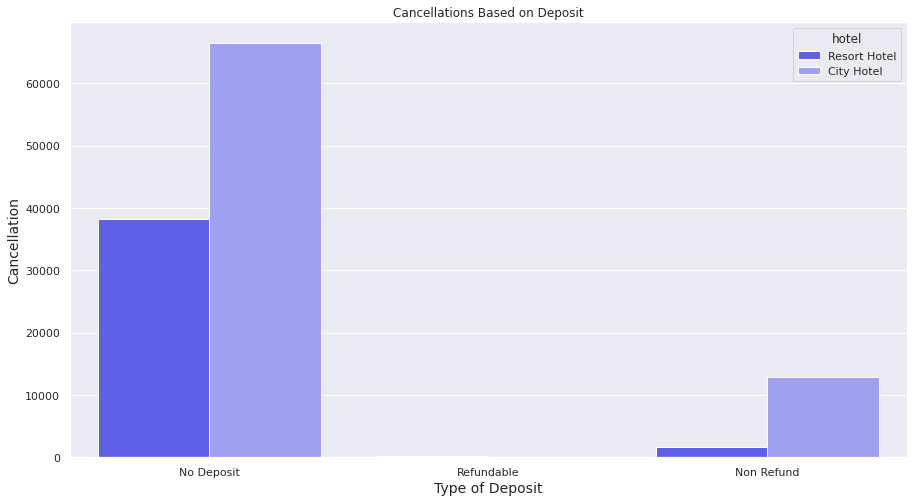

In [57]:
#checking if deposit type effect cancellation rate
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("bwr")
graph = sns.countplot(x = 'deposit_type',hue='hotel', data=df)
graph.set(title='Cancellations Based on Deposit')
graph.set_xlabel('Type of Deposit',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

This clearly shows that when there is no deposit then there is high chance of cancellation.

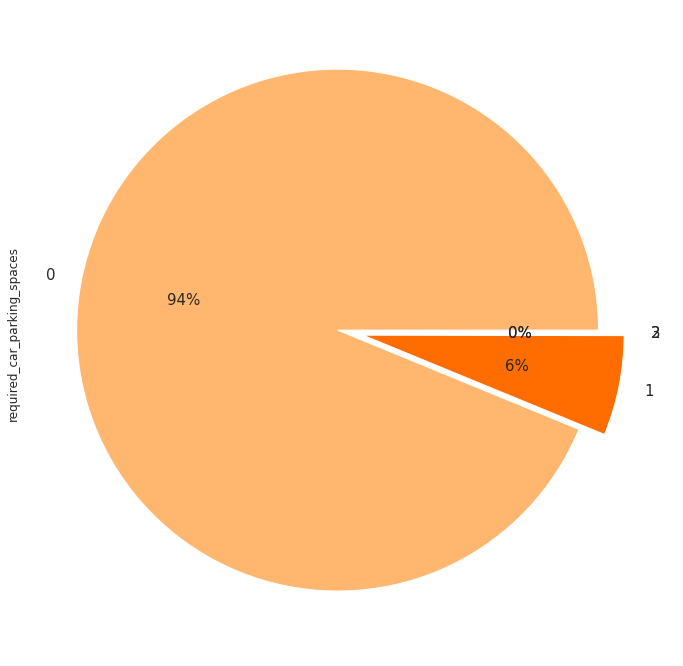

In [58]:
#checking to see weather the car parking is a factor for booking
sns.set_palette("gist_heat_r")
new_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*4, autopct='%.0f%%', figsize=(15,12),fontsize=15)

This pie graph shows that car parking is not a criteria for booking.

Text(0.5, 1.0, 'lead time in hotels')

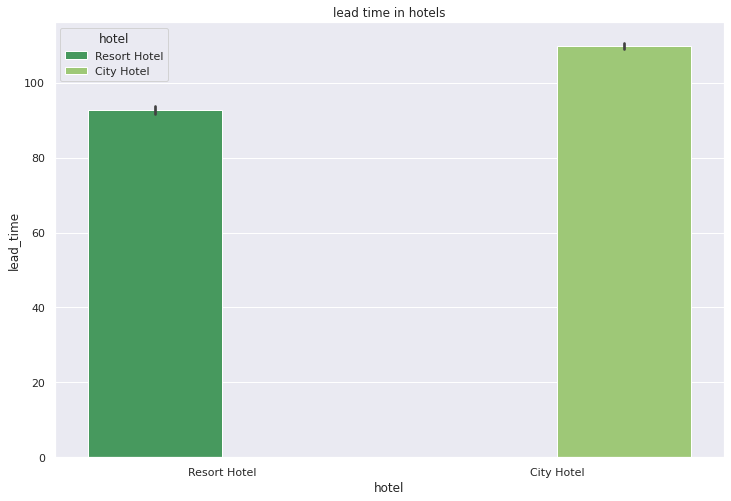

In [59]:
#to check the lead time in hotel types
plt.figure(figsize=(12,8))
sns.set_palette("RdYlGn_r")
sns.barplot(x='hotel', y='lead_time', data=df, hue='hotel')
plt.title('lead time in hotels')

This shows that the customers book their stays well in advance.Customers book resort type around 2.5 months before and the city type is usually booked more than 3 months before

Text(0, 0.5, 'Cancellation rate')

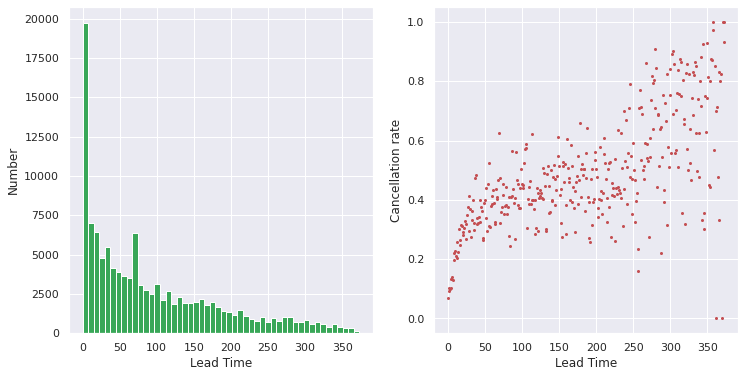

In [60]:
#Study of lead time
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(new_df['lead_time'],bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Number')
plt.subplot(122)
plt.plot(
new_df.groupby('lead_time')['is_canceled'].mean().index,
new_df.groupby('lead_time')['is_canceled'].mean(),   
    'ro',
markersize=2)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation rate')

This study tells us that the customers book nearing the date of arrival. More the lead time, more the factors that might affect the booking thus increasing the chances of cancellation.

Text(0, 0.5, 'Booking changes')

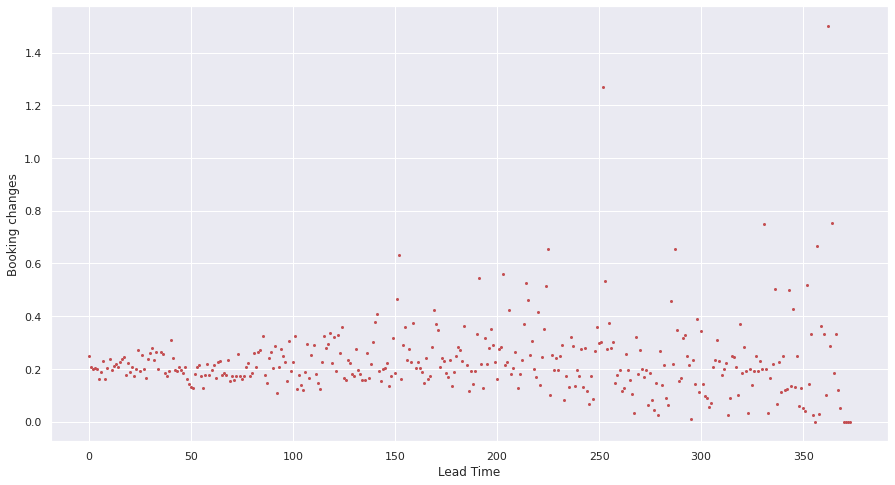

In [61]:
plt.plot(
new_df.groupby('lead_time')['booking_changes'].mean().index,
new_df.groupby('lead_time')['booking_changes'].mean(),
    'ro',
markersize=2)
plt.xlabel('Lead Time')
plt.ylabel('Booking changes')


When lead time is more then there will be a lot more time for the customer to request changes

Text(0.5, 1.0, 'wait time in hotels')

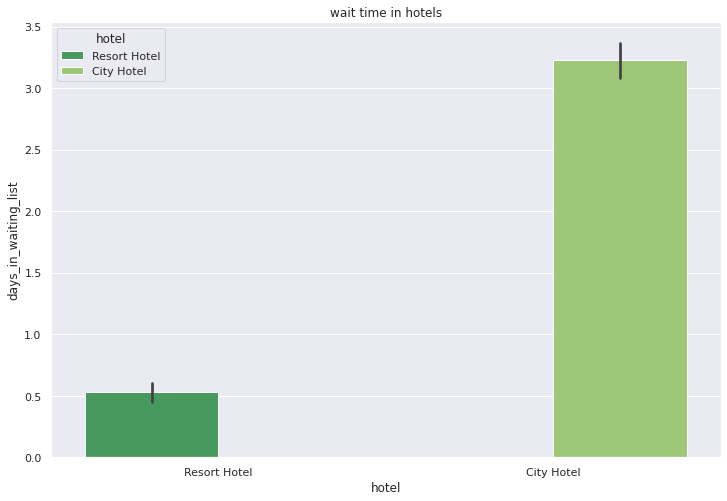

In [62]:
#check wait time across hotel types
plt.figure(figsize=(12,8))
sns.barplot(x='hotel', y='days_in_waiting_list', data=df, hue='hotel')
plt.title('wait time in hotels')

This study shows that city hotel are a lot in demand thus the wait time for city hotel is more.

Text(0, 0.5, 'ADR')

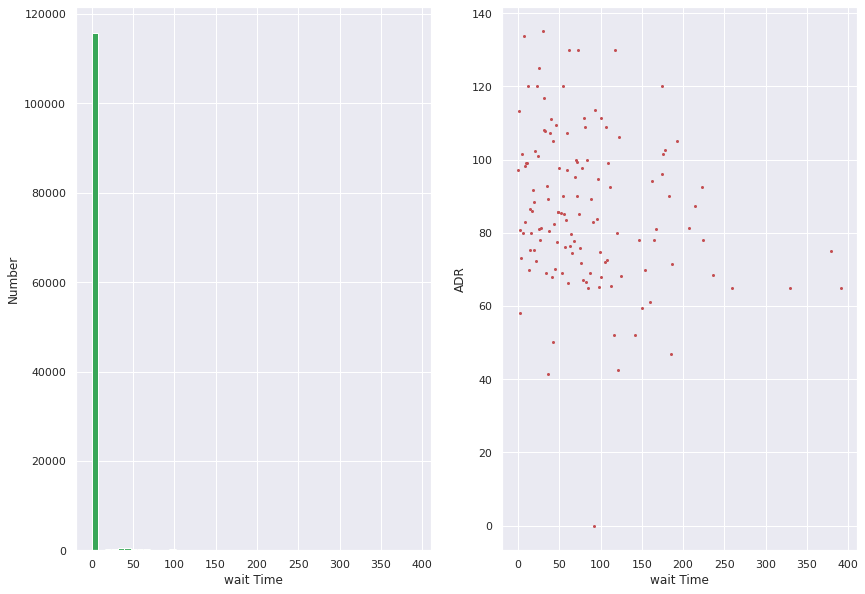

In [63]:
#wait time studies
plt.figure(figsize=(14, 10))
plt.subplot(121)
plt.hist(new_df['days_in_waiting_list'],bins=50)
plt.xlabel('wait Time')
plt.ylabel('Number')
plt.subplot(122)
plt.plot(
new_df.groupby('days_in_waiting_list')['adr'].mean().index,
new_df.groupby('days_in_waiting_list')['adr'].mean(),
'ro',
markersize=2)
plt.xlabel('wait Time')
plt.ylabel('ADR')

Customers tend to prefer a hotel with shorter wait time. more the wait time lesser booking.The price for booking rooms with lesser wait time will be at a higher price when compared to later waiting timings

Text(0, 0.5, 'Price')

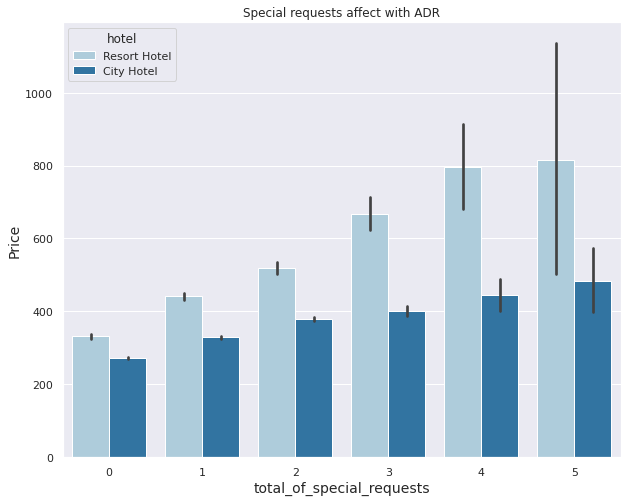

In [64]:
#adr variation with special request
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Paired")
graph = sns.barplot(x='total_of_special_requests', y='revenue', hue='hotel',data=new_df)
graph.set(title='Special requests affect with ADR')
graph.set_xlabel('total_of_special_requests',fontsize = 14)
graph.set_ylabel('Price',fontsize = 14)

Hotels charge extra to meet the speacial demands of the customers

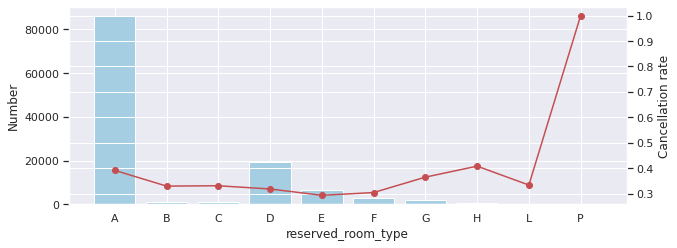

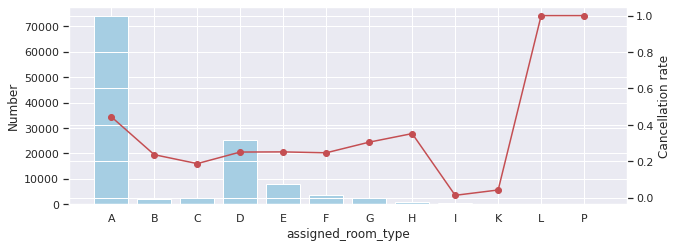

In [65]:
#Room changes studies usint the Axes.twinx() function sharing the xaxis.
index=1
for room_type in ['reserved_room_type', 'assigned_room_type']:
  ax1=plt.subplot(2,1,index)
  index+=1
  ax2=ax1.twinx()  
  ax1.bar(
      new_df.groupby(room_type).size().index,     # x= hotel_booking_df_1.groupby(room_type).size().index
      new_df.groupby(room_type).size())           #y=hotel_booking_df_1.groupby(room_type).size()
  ax1.set_xlabel(room_type)
  ax1.set_ylabel('Number')
  ax2.plot(new_df.groupby(room_type)['is_canceled'].mean(),'ro-')
  ax2.set_ylabel('Cancellation rate')
  plt.show()

As per the study most of the reserved rooms and assigned rooms are concentrated between the A,D and E rooms.
.But the cancellation rate is not very high based on this

Most of the booking are done by new customers.

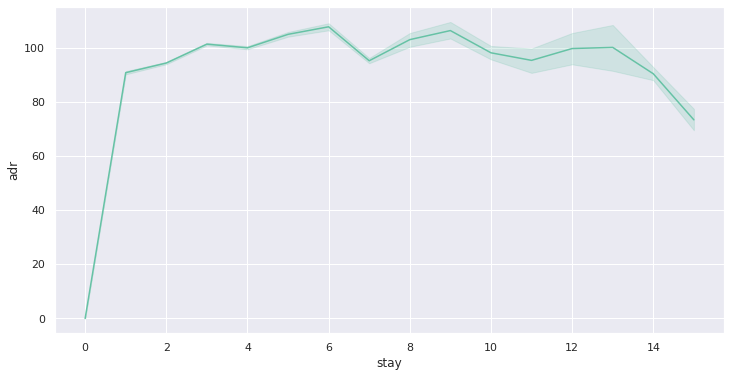

In [66]:
#Study of ADR with stay
sns.set_palette("Set2")
plt.figure(figsize = (12,6))
sns.lineplot(y = 'adr', x = 'stay', data = new_df)
plt.show()

FOr shorter stays the average cost of the room will be high. the longer the stay is the economical it becomes.

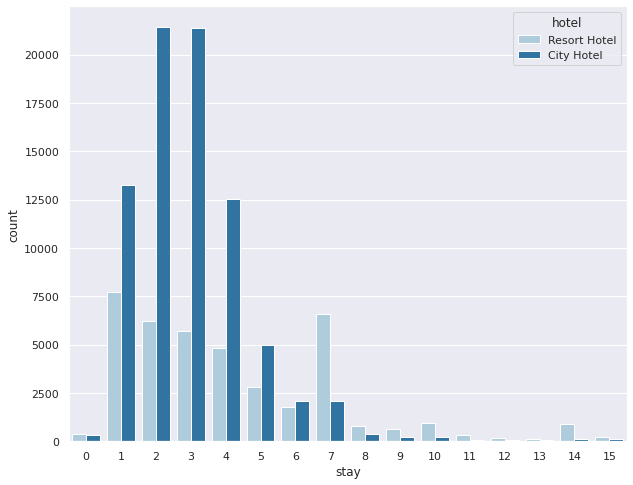

In [67]:
#optimal stay duration by cutomers
sns.set_palette("Paired")
sns.countplot(x=new_df['stay'],hue=new_df['hotel'])


People usually stay for 2 to 3 days in city hotel and probably a day or week in resort hotel.

In [68]:
#Study of hotels around the world
country_df=pd.DataFrame(df.loc[df['is_canceled']==0]['country'].value_counts())
country_df
country_df.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df['%_no_of_guests']=round(country_df['Number of Guests']/total_guests*100,2)
country_df['country']=country_df.index

In [69]:
fig=px.pie(country_df,
           values='Number of Guests',
           names='country',
           title="Home country of guests",
           template="seaborn"
           )
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

This chart shows the number of bookings done all over the country.

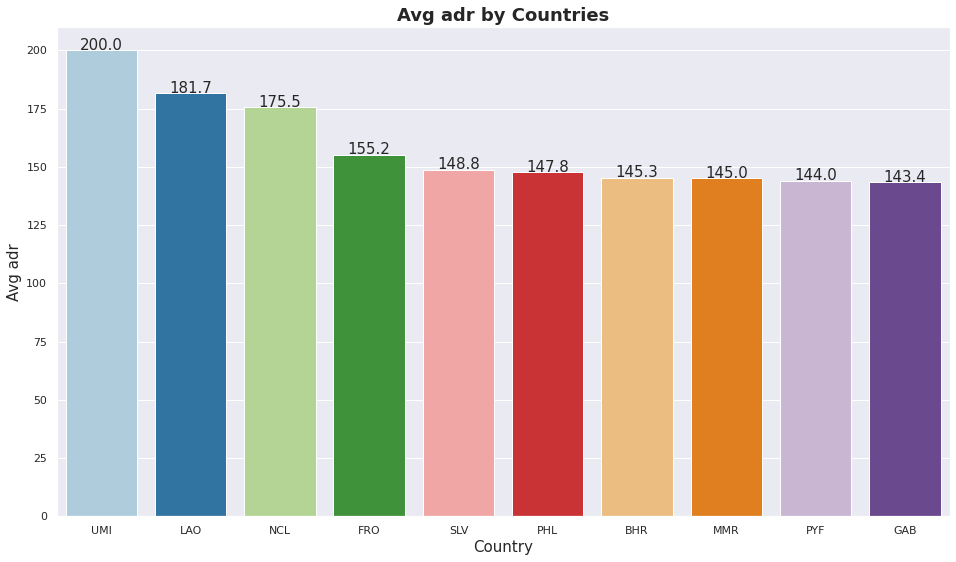

In [70]:
#Avg ADR of top 10 countries
country_adr=new_df.groupby(['country'])['adr'].mean().reset_index(). round(1)
country_adr = country_adr.sort_values(by='adr', ascending = False).head(10)

countplt, ax = plt.subplots(figsize = (16,9))
ax =sns.barplot(x='country',y='adr', data = country_adr)
ax.set_title('Avg adr by Countries',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Avg adr', fontsize = 15)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

The top 10 country with the highest ADR is presented here.Djibouti has highest Average rate of rooms as in expensive hotels

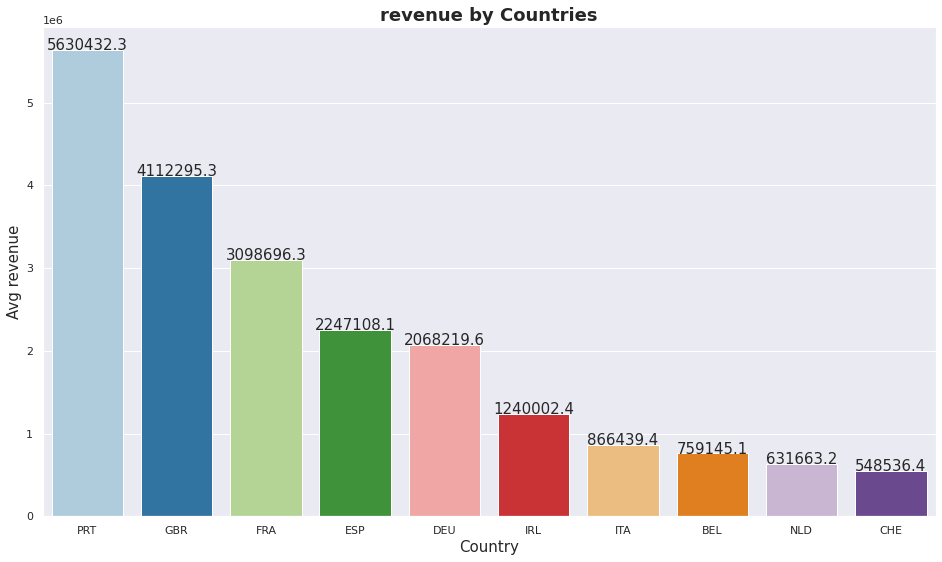

In [71]:
#revenune earned by countries
country_revenue=new_df.groupby(['country'])['revenue'].sum().reset_index(). round(1)
country_revenue= country_revenue.sort_values(by='revenue', ascending = False).head(10)

countplt, ax = plt.subplots(figsize = (16,9))
ax =sns.barplot(x='country',y='revenue', data = country_revenue)
ax.set_title('revenue by Countries',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Avg revenue', fontsize = 15)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

THe most revenue generated is Portugal.

In [72]:
#geomapping of revenue across the countries
fig = px.choropleth(df, locations="country",
                    color="adr",
                    hover_name="arrival_date_year",
                    animation_frame="hotel",
                    title = "Fare of hotels in Different Country",
                    color_continuous_scale=px.colors.sequential.PuRd)
 
 
fig["layout"].pop("updatemenus")
fig.show()